#### Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Drifters**
    
Name: **Julian S. Simon (013793273)** 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process of My Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
    - Lemmatization
    - Stemming
    - Spell Check
    - Dictionary check
- **Feature 1 :** Political affiliation
    - LDA Topic Modelling
    - Doc2Vec 
    - TF-IDF
    - LDA using TF-IDF
    - Sentiment analysis 
- Rating 
- Vectorization
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
- **Polical Affiliation**
- **Bias**
- **Sensational Analysis**
- **Credibility**


### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Political Affiliation                  |  Julian S. Simon |  
| Bias                                   |  ViswanathSingh Kambam | 
| Sensational Analysis                   |  Paramdeep Saini |   
| Credibility                            |  Rajalakshmi Babu |

 
#### Enrichment Dataset Details

  - Sensational Words Dictionary
  - PoliticalFact Fake news and Real News Content
  - Spam Dictionary
  - Kaggle Data (https://www.kaggle.com/mrisdal/fake-news)

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 

#### Political Affiliation
Political affiliation is nothing but having official connection to a news by a party. Political affliation towards certain political parties, political leaders can influence fake news origin. An unbiased view on media reports requires an understanding of the political bias of media content. 

#### What did I try and What worked? 

To begin with we had to understand the dataset. So, I have divided the dataset into test and train. The dataset had number of columns and every column was interrelated with each other. So, I decided to visualize the dataset to understand it better. From the political affiliation column, the party with the highest number of news is arranged in the decending order to findout the party which has more news. The labels are plotted against the highest number of party so that it is easy to findout how each each parities can influence the fake new detection. TF-IDF, Word2Vec and Doc2Vec approach using the dictionary of words and its polarity for vectorization. Sentimental analysis is applied on the bag of words to find the positive negative and neutral analysis. This scores are mapped to the get the fake news detection. 

#### What did not work?

Using political affiliation alone as a feature did not yield a great result. As explained about analysing with sentimental analysis gives the better result. The accuracy found by this model seems be at around 44% in average run of different algorithms such as Linear Regression, Random Forest and Naive Bayes. 



#### Read Data

In [0]:
# read data into a dataframe
import pandas as pd
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

test_filename = 'input_data/dataset/test.csv'
train_filename = 'input_data/dataset/train.csv'
valid_filename = 'input_data/dataset/valid.csv'



colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

dfs_train=train_news
dfs=train_news

> Print all the columns for better understanding of the dataset

In [0]:
print("Number of Rows and Columns::", dfs.shape)
print(dfs_train.loc[0])

Number of Rows and Columns:: (10240, 14)
jsonid                                                       2635.json
label                                                            false
headline_text        Says the Annies List political group supports ...
subject                                                       abortion
speaker                                                   dwayne-bohac
speakerjobtitle                                   State representative
stateinfo                                                        Texas
partyaffiliation                                            republican
barelytruecounts                                                     0
falsecounts                                                          1
halftruecounts                                                       0
mostlytrueocunts                                                     0
pantsonfirecounts                                                    0
context                             

#### Cleaning and Preprocessing

In [0]:
X_train=dfs["partyaffiliation"]
Y_train=dfs["label"]

In [0]:
CT = pd.crosstab(dfs_train['partyaffiliation'],dfs_train['label'],margins=True)

>  Identify the labels for different party affiliations

In [0]:
CT.sort_values('All', ascending=False)

label,barely-true,false,half-true,mostly-true,pants-fire,true,All
partyaffiliation,,,,,,,
All,1654,1993,2114,1962,839,1676,10238
republican,832,1028,890,707,380,660,4497
democrat,463,511,750,801,153,658,3336
none,261,326,327,315,269,246,1744
organization,45,50,59,24,17,24,219
independent,19,18,27,51,3,29,147
newsmaker,7,9,11,11,3,15,56
libertarian,4,6,12,9,3,6,40
activist,7,7,9,11,0,5,39


> Find the total number of times each party was mentioned in the dataset. From this we can infer the that which parties are in the news and which are not.

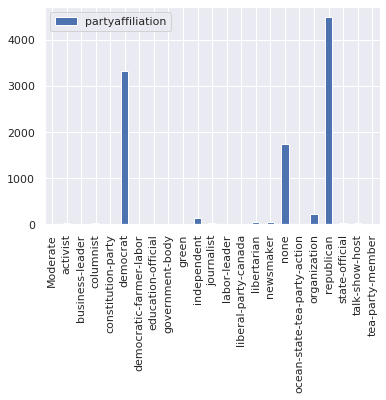

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs['partyaffiliation'].value_counts().sort_index(ascending=True).head(10264).plot(kind='bar', ax=ax, legend=True)

> Visualize the value barely-true for the entire dataset

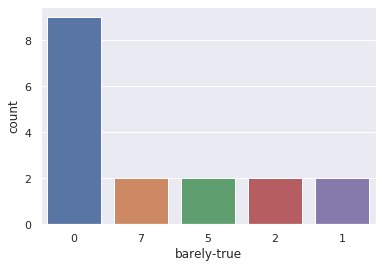

In [0]:
import seaborn as sns
sns.countplot(x="barely-true", data=CT,order=CT["barely-true"].value_counts().iloc[:5].index)
plt.show()

##### Read the Label 
> Print the values such as false, half-false, true, etc. for the party replublican. 
  From this we can visualize the true and false news about a particular party. 

In [0]:
import numpy as np
mask = np.column_stack([dfs[col].str.contains("republican") for col in ['partyaffiliation']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

[[True]
 [False]
 [False]
 ...
 [True]
 [False]
 [True]]


{False: 136, nan: 1, True: 2818}

In [0]:
dfs['mask'] = mask

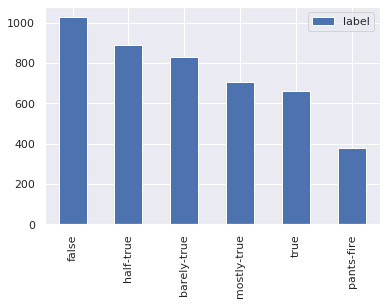

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['mask']==True]['label'].value_counts().plot(kind='bar', ax=ax, legend=True)

In [0]:
import numpy as np
mask = np.column_stack([dfs[col].str.contains("democrat") for col in ['partyaffiliation']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

[[False]
 [True]
 [True]
 ...
 [False]
 [True]
 [False]]


{False: 1972, nan: 1, True: 3337}

In [0]:
dfs['mask'] = mask

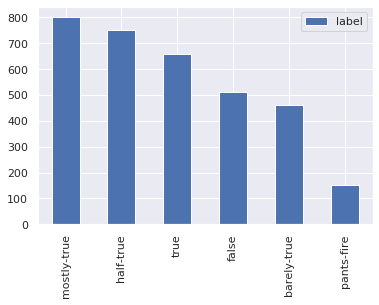

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = dfs[dfs['mask']==True]['label'].value_counts().plot(kind='bar', ax=ax, legend=True)

##### Lemmatization

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/julian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
WordNetLemmatizer().lemmatize('went', pos='v')

'go'

In [0]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [0]:
def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    sdds= gensim.utils.simple_preprocess(text)
    for token in sdds:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

#### Validation

In [0]:
doc_sample = dfs_train[dfs_train['jsonid'] == '2635.json']["headline_text"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


In [0]:
# do for all documents
processed_docs = dfs_train['headline_text'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: headline_text, dtype: object

#### Doc2Vector with Dictionary

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


#### Dedup the words and apply the doc2bow

In [0]:
# remove all words that appear too many or too few times and restrict to 100000 words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1072 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

(24, 2)

In [0]:
# corpus and frequency count for each document
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 7 ("administr") appears 1 time.
Word 85 ("economi") appears 1 time.
Word 127 ("scott") appears 1 time.
Word 128 ("walker") appears 1 time.
Word 182 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 277 ("public") appears 1 time.
Word 323 ("hear") appears 1 time.
Word 542 ("charg") appears 1 time.
Word 792 ("talk") appears 1 time.
Word 1023 ("field") appears 1 time.
10240


In [0]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [0]:
corpus_tfidf = tfidf[bow_corpus]

In [0]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]


#### Apply LDA

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.059*"say" + 0.024*"state" + 0.019*"vote" + 0.016*"texa" + 0.014*"american" + 0.012*"billion" + 0.011*"percent" + 0.011*"year" + 0.010*"million" + 0.010*"clinton"
Topic: 1 
Words: 0.039*"say" + 0.016*"american" + 0.014*"care" + 0.014*"vote" + 0.012*"state" + 0.011*"obamacar" + 0.011*"trump" + 0.010*"year" + 0.010*"kill" + 0.009*"health"
Topic: 2 
Words: 0.056*"obama" + 0.043*"presid" + 0.042*"say" + 0.034*"barack" + 0.020*"year" + 0.016*"illeg" + 0.014*"time" + 0.013*"rate" + 0.012*"immigr" + 0.010*"vote"
Topic: 3 
Words: 0.043*"say" + 0.034*"state" + 0.033*"health" + 0.028*"care" + 0.013*"plan" + 0.012*"want" + 0.012*"job" + 0.012*"romney" + 0.010*"year" + 0.009*"nation"
Topic: 4 
Words: 0.051*"percent" + 0.027*"year" + 0.027*"say" + 0.018*"state" + 0.012*"plan" + 0.009*"employe" + 0.009*"public" + 0.009*"averag" + 0.008*"privat" + 0.007*"incom"
Topic: 5 
Words: 0.040*"say" + 0.022*"vote" + 0.022*"school" + 0.017*"year" + 0.015*"democrat" + 0.014*"spend" + 0.012*"oba

#### Apply TF-IDF

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [0]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"job" + 0.014*"percent" + 0.012*"countri" + 0.011*"say" + 0.010*"state" + 0.010*"bush" + 0.009*"creat" + 0.009*"presid" + 0.008*"year" + 0.008*"obama"
Topic: 1 Word: 0.011*"school" + 0.010*"percent" + 0.010*"say" + 0.009*"state" + 0.009*"year" + 0.008*"million" + 0.008*"debt" + 0.008*"nation" + 0.008*"american" + 0.007*"histori"
Topic: 2 Word: 0.013*"obama" + 0.013*"say" + 0.011*"rais" + 0.011*"time" + 0.011*"presid" + 0.011*"vote" + 0.011*"barack" + 0.010*"billion" + 0.008*"tax" + 0.008*"million"
Topic: 3 Word: 0.011*"say" + 0.010*"mccain" + 0.010*"year" + 0.010*"state" + 0.009*"john" + 0.009*"care" + 0.009*"illeg" + 0.008*"rat" + 0.008*"health" + 0.008*"govern"
Topic: 4 Word: 0.013*"say" + 0.013*"state" + 0.010*"billion" + 0.009*"budget" + 0.008*"deficit" + 0.008*"percent" + 0.008*"texa" + 0.007*"illeg" + 0.007*"year" + 0.007*"counti"
Topic: 5 Word: 0.017*"spend" + 0.014*"say" + 0.010*"percent" + 0.009*"state" + 0.008*"million" + 0.008*"secur" + 0.007*"social" + 

In [0]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7678734064102173	 
Topic: 0.040*"say" + 0.022*"vote" + 0.022*"school" + 0.017*"year" + 0.015*"democrat" + 0.014*"spend" + 0.012*"obama" + 0.011*"peopl" + 0.011*"million" + 0.011*"public"

Score: 0.1705670952796936	 
Topic: 0.034*"say" + 0.020*"million" + 0.020*"state" + 0.015*"job" + 0.014*"year" + 0.013*"creat" + 0.010*"peopl" + 0.009*"half" + 0.009*"citi" + 0.008*"wisconsin"


In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9307435154914856	 
Topic: 0.017*"spend" + 0.014*"say" + 0.010*"percent" + 0.009*"state" + 0.008*"million" + 0.008*"secur" + 0.007*"social" + 0.007*"year" + 0.007*"vote" + 0.006*"increas"


#### Classifying sample documents using LDA bag of words model.

In [0]:
unseen_document = 'Obama immigration plan to bring undocumented did not help with the mainstream politics as Legal immigrants are still struggling to get their green card.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.4751015603542328	 Topic: 0.040*"say" + 0.022*"vote" + 0.022*"school" + 0.017*"year" + 0.015*"democrat"
Score: 0.4582090377807617	 Topic: 0.034*"say" + 0.020*"million" + 0.020*"state" + 0.015*"job" + 0.014*"year"


/home/julian/ml-cmpe257/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,label,subject,verdict
0,false,abortion,NaN
1,half-true,"energy,history,job-accomplishments",1.0
2,mostly-true,foreign-policy,1.0
3,false,health-care,NaN
4,half-true,"economy,jobs",1.0
...,...,...,...
10235,mostly-true,"animals,elections",1.0
10236,mostly-true,elections,1.0
10237,half-true,"retirement,social-security",1.0
10238,false,"florida,foreign-policy",NaN


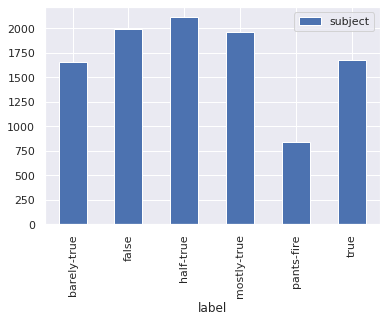

In [0]:
dfTwoCols= dfs_train[['label','subject']]
dfTwoCols.groupby("label").count().plot(kind='bar')
dfTwoCols['verdict'] = dfTwoCols['label'].map({False: 0, True: 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

In [0]:
dfs_train_sensa= dfs_train
dfs_train_sensa['verdict']=dfTwoCols['verdict']
dfs_train_sensa

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,mask,verdict
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False,NaN
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,True,1.0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,True,1.0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,False,NaN
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",False,1.0
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,False,1.0
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,False,1.0
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,True,NaN


In [0]:
from nltk.corpus import wordnet as wn

def preprocess(raw_news):
    import nltk    
    news = re.sub("[^a-zA-Z]", " ", raw_news)    
    news =  news.lower()     
    news_words = nltk.word_tokenize( news)        
    stops = set(nltk.corpus.stopwords.words("english"))       
    words = [w for w in  news_words  if not w in stops]        
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]     
    return " ".join(stems)


import re
dfs['stemmed'] = dfs["headline_text"].apply(preprocess) 
#testing['statement'] = testing["statement"].apply(cleaning)
print(len(dfs), "headline_text")
#print(len(testing), "statements")

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def lemmatize(self, word, pos=wn.NOUN):
    lemmas = wordnet._morphy(word, pos)
    return min(lemmas, key=len) if lemmas else word

10240 headline_text


In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import time
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))
# clean text and title and create new column "tokenized"
t1 = time.time()
dfs['tokenized'] = dfs['headline_text'].apply(apply_all)
t2 = time.time()
print("Time to clean and tokenize", len(dfs), "articles:", (t2-t1)/60, "min")

Time to clean and tokenize 10240 articles: 0.17471845944722494 min


In [0]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
testing = dfs['headline_text']

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/julian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Apply Sentimental Analysis

In [0]:
sid = SentimentIntensityAnalyzer()

In [0]:
count=0
for x in testing:
    if count<3:
        print(x)
        ss = sid.polarity_scores(x)
        for k in sorted(ss):
            print("{0}:{1},".format (k, ss[k]), end ="\n\n")
            print
    count+=1

Says the Annies List political group supports third-trimester abortions on demand.
compound:0.25,

neg:0.115,

neu:0.692,

pos:0.192,

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
compound:0.3612,

neg:0.0,

neu:0.902,

pos:0.098,

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
compound:0.3182,

neg:0.107,

neu:0.687,

pos:0.206,



### Sentimetal Polarity Summary

In [0]:
sentiment_polarity = [] 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# install Vader and make sure you download the lexicon as well
sid = SentimentIntensityAnalyzer()
# this step will return an error if you have not installed the lexicon
summary = {"positive":0,"neutral":0,"negative":0}
for x in dfs['headline_text']: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
        sentiment_polarity.append("neutral")
        
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
        sentiment_polarity.append("positive")
     
    else:
        summary["negative"] +=1
        sentiment_polarity.append("negative")
        
print(summary)
dfs['sentiment_polarity'] = sentiment_polarity

{'positive': 3350, 'neutral': 3488, 'negative': 3402}


In [0]:
from os import path
#train_path = Path('.')
import pandas as pd


headers = ['id','label','statement','subject',
           'speaker','job_title', 'state', 
           'affliation','barely_true','false',
           'half_true', 'mostly_true','pants_on_fire', 
           'venue']
print (len(headers))
train_df = pd.read_csv('input_data/dataset/train.csv', names=headers, delimiter='\t')
valid_df = pd.read_csv('input_data/dataset/valid.csv', names=headers, delimiter='\t')
#liar_test_df = pd.read_csv('test.csv',names=headers, delimiter='\t')
#train_df['statement'].head()

14


In [0]:
word_vector_input_dataset = []
word_vector_input_dataset = train_df.statement.tolist()

### Create and Save the model

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
data = word_vector_input_dataset
tagged_data = []
exception_count = 0
for i, _d in enumerate(data):
    try:
        tagged_data.append(TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]))
    except:
        exception_count+=1
### Train doc2vec embeddings 
print ("Total number of custom documents:",len(tagged_data))
max_epochs = 10
vec_size = 10
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=10,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v1.model")
print("Model Saved")

Total number of custom documents: 10240
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
text = "obama supports third trimester abortion"
dvmodel= Doc2Vec.load("d2v1.model") ### Using a earlier trained model d2v.model 
test_sentence= [dvmodel.infer_vector(word_tokenize(text))]
print (test_sentence)

[array([-0.0074646 ,  0.05723345, -0.1463731 ,  0.01462692, -0.09596941,
        0.11938942,  0.0427803 , -0.02199837, -0.06841835,  0.05290281],
      dtype=float32)]


In [0]:
statements = train_df.statement.tolist()
statements_wv = [dvmodel.infer_vector(word_tokenize(x)) for x in statements]

In [0]:
dataframe = pd.DataFrame(statements_wv)
#dataframe['affliation'] = pd.Series(tr_affliation)
dataframe['state'] = pd.Series(train_df.state)
dataframe['job_title'] = pd.Series(train_df.job_title)
dataframe['venue'] = pd.Series(train_df.venue)
dataframe.columns=['0','1','2','3','4','5','6','7','8','9','state','job_title','venue']
dataframe['label'] = pd.Series(train_df.label)

In [0]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,state,job_title,venue,label
0,-0.125368,-0.375557,0.056261,0.352918,-0.040274,-0.097544,-0.389486,0.003576,-0.029729,0.189919,Texas,State representative,a mailer,false
1,-0.690600,-0.497279,-0.017738,0.102488,-0.162767,0.085180,0.321083,0.409785,0.154653,0.915860,Virginia,State delegate,a floor speech.,half-true
2,-0.306625,-0.546128,0.048448,0.496918,-0.092999,-0.025112,-0.512577,0.042493,0.236018,0.471907,Illinois,President,Denver,mostly-true
3,-0.235435,-0.226106,0.041298,0.440702,-0.162966,-0.216328,-0.212324,0.065749,-0.025990,-0.093750,NaN,NaN,a news release,false
4,-0.297053,-0.270224,0.075505,0.119551,-0.121097,-0.062808,-0.201305,-0.090276,0.185439,0.491351,Florida,NaN,an interview on CNN,half-true


#### Test the data

In [0]:
headers = ['id','label','statement','subject',
           'speaker','job_title', 'state', 
           'affliation','barely_true','false',
           'half_true', 'mostly_true','pants_on_fire', 
           'venue']
dfs_test = pd.read_csv('input_data/dataset/test.csv', names=headers, delimiter='\t')
dfs=dfs_test
msg_test=dfs_test["statement"]
dfTwoCols_test= dfs_test[['label','subject']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({'false': 0, 'true': 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)

[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


/home/julian/ml-cmpe257/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
dfs_test_sensa=dfs_test
dfs_test_sensa['verdict']=dfTwoCols_test['verdict']
dfs_test_sensa

,id,label,statement,subject,speaker,job_title,state,affliation,barely_true,false,half_true,mostly_true,pants_on_fire,venue,verdict
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,1
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,1
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28,23,38,34,7,a news conference,1
1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2,0,0,1,0,"on ABC's ""This Week""",0
1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1,0,0,0,0,a commentary in The Providence Journal,0
1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9,8,10,18,3,a news conference,0


In [0]:
x_train=dfs_train_sensa[dfs_train_sensa.columns[14]]
y_train=dfs_train_sensa['verdict']
x_test= dfs_test_sensa[dfs_test_sensa.columns[14]]
y_test = dfs_test_sensa['verdict']

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x_train=le.fit_transform(x_train)
#x_train=le.transform(x_train)
y_train=le.fit_transform(y_train)
y_train

array([3672,    1,    1, ...,    1, 2267,    0])

In [0]:
x_train=np.array(x_train)
x_train=x_train.reshape(-1,1)
x_train = [x for x in x_train if str(x) != 'nan']
#print(x_train)
x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)
x_test = [x for x in x_test if str(x) != 'nan']
y_train=np.array(y_train).reshape(-1,1)
y_train = [x for x in y_train if str(x) != 'nan']
y_train 

[array([3672]),
 array([1]),
 array([1]),
 array([377]),
 array([1]),
 array([367]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([285]),
 array([1]),
 array([0]),
 array([1]),
 array([269]),
 array([0]),
 array([1]),
 array([1]),
 array([315]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([604]),
 array([1]),
 array([1]),
 array([577]),
 array([1]),
 array([640]),
 array([0]),
 array([648]),
 array([1]),
 array([1]),
 array([506]),
 array([505]),
 array([462]),
 array([0]),
 array([478]),
 array([494]),
 array([1]),
 array([0]),
 array([0]),
 array([524]),
 array([1]),
 array([0]),
 array([195]),
 array([0]),
 array([247]),
 array([0]),
 array([0]),
 array([164]),
 array([156]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([21]),
 array([1]),
 array([123]),
 array([1]),
 array([229]),
 array([1]),
 array([94]),
 array([0]),
 array([45]),
 array([52]),
 array([0]),
 array([0]),
 array([1258]),
 array([0]),
 array([1]),

## Run Prediction and Compute Error and Accuracy

### Decision Tree  

/home/julian/ml-cmpe257/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/julian/ml-cmpe257/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267

Confusion matrix:
 [[  0 553]
 [  0 714]]
Accuracy score is:
0.56353591160221


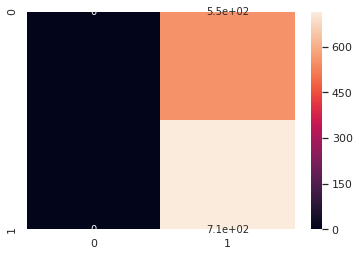

In [0]:

from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
dtree=DecisionTreeClassifier()
features = list(dfs_train_sensa.columns[14])
from sklearn.metrics import accuracy_score
#features = array.reshape(-1, 1)


dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
cnfmtx=confusion_matrix(y_test,y_pred)
print("Classification \n", classification_report(y_test,y_pred))
print("Confusion matrix:\n",cnfmtx)
print('Accuracy score is:')
print(accuracy_score(y_test,y_pred))

sns.heatmap(cnfmtx,annot=True)

### Naive Bayes

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print("Classification \n", classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))

Classification 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     553.0
           1       0.00      0.00      0.00     714.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00    1267.0
   macro avg       0.00      0.00      0.00    1267.0
weighted avg       0.00      0.00      0.00    1267.0

Confusion matrix:
 [[  0   0 553   0]
 [  0   0   0 714]
 [  0   0   0   0]
 [  0   0   0   0]]
Mean squared error: 10.76
Mean absolute error: 3.13
Root Mean Squared Error: 3.28 


### Support Vector Machine

In [0]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
cnfmtx=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, predictions))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267

Confusion matrix:
 [[  0 553]
 [  0 714]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 


### Random Forest

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))
cnfmtx=confusion_matrix(y_test,rfc_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, rfc_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, rfc_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, rfc_pred)))
print("Accuracy ",accuracy_score(y_test,rfc_pred))

#plot 1 tree
#tree = rfc.estimators_[5]
#export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#Image(graph.create_png())


#get important features
# Get numerical feature importances
importances = list(rfc.feature_importances_)
print(importances)
#features = count(list(dfs_train_sensa.columns[15:18]))
#print(features)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#plot important features
#x_values = list(range(len(importances)))
# Make a bar chart
#plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
#plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
#plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267

Confusion matrix:
 [[  0 553]
 [  0 714]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy  0.56353591160221
[1.0]


### Observation and Inference:

Political affiliation is efficient when we consider the verdict, statements and ploitical affiliation column together. 
But this is not sufficient to test the fake news. So I can assign around 20% weightage to political affiliation.
so the equation would be 
 #### 0.2*(result from random forest/naive bayes)
